In [1]:
# @title Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Cleanup column names for easier access
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print("Data loaded successfully!")
df.head()

Data loaded successfully!


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# @title 1. Descriptive Statistics
desc_stats = df.groupby('species')['sepal_length'].agg(['mean', 'median', 'std'])

print("Descriptive Statistics for Sepal Length")
print(desc_stats)

# Identify highest variability
highest_var_species = desc_stats['std'].idxmax()
print(f"\nSpecies with highest variability: {highest_var_species}")

Descriptive Statistics for Sepal Length
             mean  median       std
species                            
setosa      5.006     5.0  0.352490
versicolor  5.936     5.9  0.516171
virginica   6.588     6.5  0.635880

Species with highest variability: virginica


/tmp/ipython-input-2006744020.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_stats = df.groupby('species')['sepal_length'].agg(['mean', 'median', 'std'])


# 1. Descriptive Statistics
Virginica shows the highest variability (standard deviation $\approx 0.64$), meaning its sepal lengths are less consistent than the highly uniform Setosa.

In [3]:
# @title 2. Central Tendency & Dispersion

def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

# Calculate statistics
petal_stats = df.groupby('species')['petal_length'].agg(['mean', 'median', 'var', 'std'])
petal_stats['mode'] = df.groupby('species')['petal_length'].apply(get_mode)

print("--- Petal Length Statistics ---")
print(petal_stats)

--- Petal Length Statistics ---
             mean  median       var       std  mode
species                                            
setosa      1.462    1.50  0.030159  0.173664   1.4
versicolor  4.260    4.35  0.220816  0.469911   4.5
virginica   5.552    5.55  0.304588  0.551895   5.1


/tmp/ipython-input-1805548716.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  petal_stats = df.groupby('species')['petal_length'].agg(['mean', 'median', 'var', 'std'])
/tmp/ipython-input-1805548716.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  petal_stats['mode'] = df.groupby('species')['petal_length'].apply(get_mode)


# 2. Central Tendency & Dispersion
For Versicolor, the mean is lower than the median due to negative skewness; this shows how outliers (shorter petals) can drag the average down while the median stays robust.

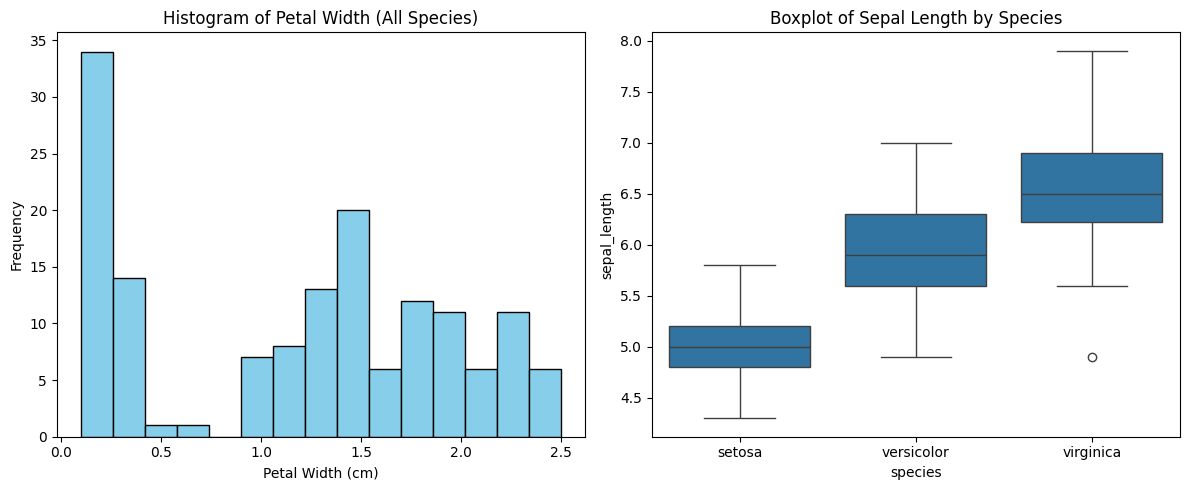

In [4]:
# @title 3. Visualization

plt.figure(figsize=(12, 5))

# Plot 1: Histogram of Petal Width
plt.subplot(1, 2, 1)
plt.hist(df['petal_width'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Petal Width (All Species)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

# Plot 2: Boxplot of Sepal Length
plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Boxplot of Sepal Length by Species')

plt.tight_layout()
plt.show()

# 3. Visualization

The boxplot is the better choice; it clearly separates the data by species, whereas the combined histogram overlaps the groups and obscures the differences.

In [5]:
# @title 4. Distributions & Skewness

skewness = df.groupby('species')['petal_length'].apply(lambda x: x.skew())

print("--- Skewness of Petal Length ---")
print(skewness)

print(f"\nMost Positively Skewed: {skewness.idxmax()}")
print(f"Most Negatively Skewed: {skewness.idxmin()}")

--- Skewness of Petal Length ---
species
setosa        0.106394
versicolor   -0.606508
virginica     0.549445
Name: petal_length, dtype: float64

Most Positively Skewed: virginica
Most Negatively Skewed: versicolor


/tmp/ipython-input-1423610982.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skewness = df.groupby('species')['petal_length'].apply(lambda x: x.skew())


# 4. Distributions & Skewness
Virginica is the most positively skewed (tail extends to longer petals), while Versicolor is the most negatively skewed (tail extends to shorter petals).

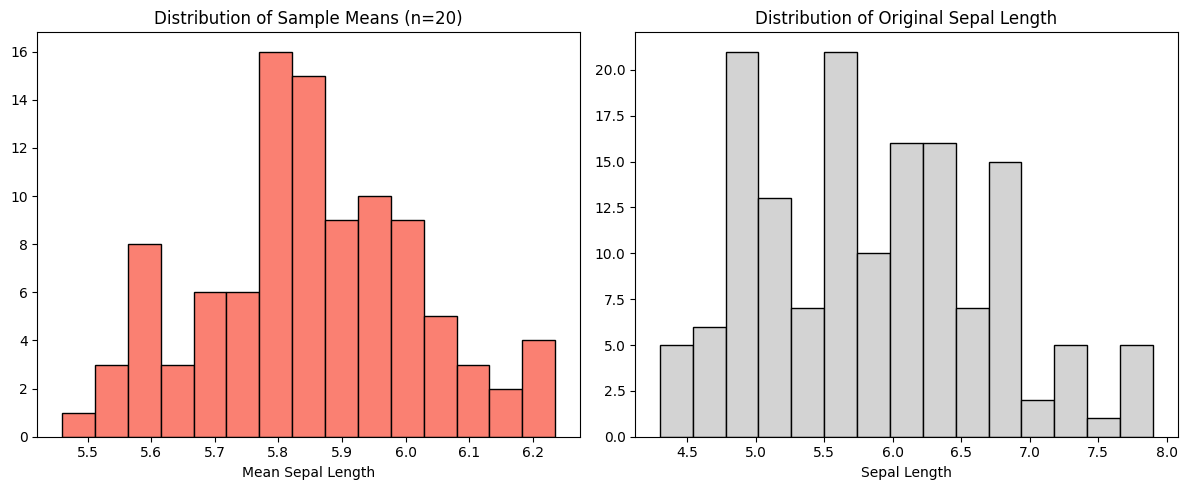

In [6]:
# @title 5. Sampling & Central Limit Theorem

# Parameters
n = 20
num_samples = 100
sample_means = []

# Random Sampling Loop
np.random.seed(42) # for reproducibility
population_data = df['sepal_length']

for _ in range(num_samples):
    sample = np.random.choice(population_data, size=n, replace=False)
    sample_means.append(np.mean(sample))

# Plotting
plt.figure(figsize=(12, 5))

# Plot Sample Means
plt.subplot(1, 2, 1)
plt.hist(sample_means, bins=15, color='salmon', edgecolor='black')
plt.title(f'Distribution of Sample Means (n={n})')
plt.xlabel('Mean Sepal Length')

# Plot Original Data
plt.subplot(1, 2, 2)
plt.hist(population_data, bins=15, color='lightgray', edgecolor='black')
plt.title('Distribution of Original Sepal Length')
plt.xlabel('Sepal Length')

plt.tight_layout()
plt.show()

# 5. Sampling & Central Limit Theorem
The histogram of the sample means forms a bell curve (Normal distribution), demonstrating that averages of samples distribute normally even though the original data was irregular/multimodal.

Pearson Correlation (r): 0.8718
Relationship: Positive


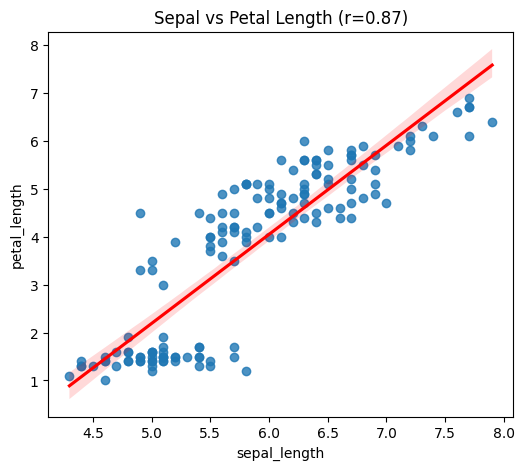

In [7]:
# @title 6. Correlation

# Compute Pearson correlation
r_val, p_val = stats.pearsonr(df['sepal_length'], df['petal_length'])

print(f"Pearson Correlation (r): {r_val:.4f}")
if r_val > 0:
    print("Relationship: Positive")
elif r_val < 0:
    print("Relationship: Negative")
else:
    print("Relationship: None")

# Plot Scatter with Regression Line
plt.figure(figsize=(6, 5))
sns.regplot(x='sepal_length', y='petal_length', data=df, line_kws={'color': 'red'})
plt.title(f'Sepal vs Petal Length (r={r_val:.2f})')
plt.show()

# 6. Correlation
There is a strong positive relationship ($r \approx 0.87$) between sepal length and petal length; as one grows larger, the other almost always does too.

In [8]:
# @title 7. Hypothesis Testing: t-Test (2 Groups)

# Filter data
setosa_pl = df[df['species'] == 'setosa']['petal_length']
versicolor_pl = df[df['species'] == 'versicolor']['petal_length']

# Perform t-test
t_stat, p_val = stats.ttest_ind(setosa_pl, versicolor_pl)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4e}") # scientific notation for very small numbers

if p_val < 0.05:
    print("Conclusion: Reject Null Hypothesis (Means are significantly different)")
else:
    print("Conclusion: Fail to Reject Null Hypothesis")

t-statistic: -39.4927
p-value: 5.4049e-62
Conclusion: Reject Null Hypothesis (Means are significantly different)


# 7. Hypothesis Testing: t-Test (2 Groups)
The p-value is practically zero ($p < 0.05$), confirming that the difference in petal length between Setosa and Versicolor is statistically significant, not due to chance.

In [9]:
# @title 8. Hypothesis Testing: ANOVA (3 Groups)


# Filter data
group1 = df[df['species'] == 'setosa']['petal_width']
group2 = df[df['species'] == 'versicolor']['petal_width']
group3 = df[df['species'] == 'virginica']['petal_width']

# Perform ANOVA
f_stat, p_val = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4e}")

if p_val < 0.05:
    print("Conclusion: Reject Null Hypothesis (At least one group differs)")
else:
    print("Conclusion: Fail to Reject Null Hypothesis")

F-statistic: 960.0071
p-value: 4.1694e-85
Conclusion: Reject Null Hypothesis (At least one group differs)


# 8. Hypothesis Testing: ANOVA (3 Groups)
The p-value is extremely low ($p < 0.05$), confirming that petal width varies significantly across the three species groups.